In [21]:
# 주가 수익률 불러오기
from alpha_vantage.timeseries import TimeSeries

import pandas_datareader as pdr
# import fix_yahoo_finance

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
print("set done")

set done


In [119]:
#삼성전자
se_data = pdr.data.get_data_yahoo('005930.KS','2020-01-01','2020-12-31')
se_df = pd.DataFrame(se_data)
# 전일종가 차이 return 저장
se_df["return"]= se_df["Adj Close"].apply(math.log).diff()

#sk하이닉스
sk_data = pdr.data.get_data_yahoo('000660.KS','2020-01-01','2020-12-31')
sk_df = pd.DataFrame(sk_data)
# 전일종가 차이 return 저장
sk_df["return"]= sk_df["Adj Close"].apply(math.log).diff()

#코스피 인덱스
kospi_data = pdr.data.get_data_yahoo('^KS11','2020-01-01','2020-12-31')
kospi_df = pd.DataFrame(kospi_data)
# 전일종가 차이 return 저장
kospi_df["return"]= kospi_df["Adj Close"].apply(math.log).diff()

x1 = pd.DataFrame(se_df["return"].iloc[3:])
x2 = pd.DataFrame(sk_df["return"].iloc[3:])
y = (kospi_df["return"].iloc[3:])

In [106]:
# 데이터 속성 파악 (Exploratory Data Analysis)
z = pd.DataFrame(np.random.rand(y.shape[0]))
y_std = np.dot((y-y.mean()),(1/math.sqrt(np.var(y))))

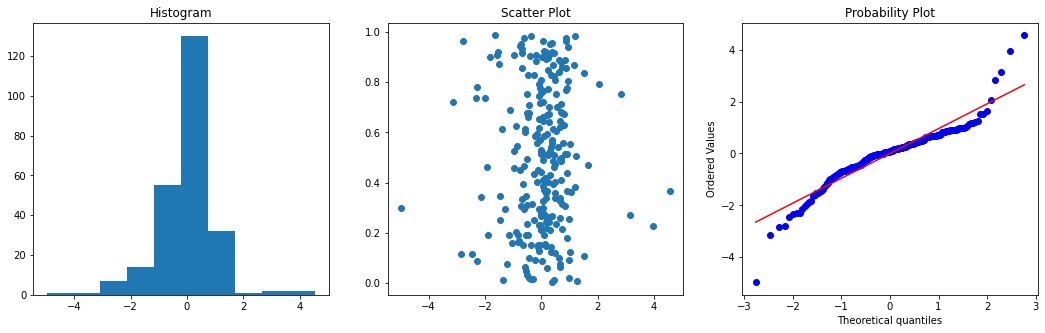

In [107]:
import scipy.stats as stats

# 정규분포 검증
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.hist(y_std)
plt.title("Histogram")
plt.subplot(132)
plt.title("Scatter Plot")
plt.scatter(y_std,z)
plt.subplot(133)
stats.probplot(y_std, plot=plt)
plt.show()

# 검증 결과, 대체로 정규성을 띈다고 판단 가능
# =>normal equation으로 모델링

In [120]:
import statsmodels.api as sm

X1 = sm.add_constant(x1)
theta1 = np.dot(np.dot(X1.T,X1),np.dot(X1.T,y))
X1_p = sm.add_constant(pd.concat([x1,x1**2,x1**3,x1**4],axis=1))
theta1_p = np.dot(np.dot(X1_p.T,X1_p),np.dot(X1_p.T,y))

X2 = sm.add_constant(x2)
theta2 = np.dot(np.dot(X2.T,X2),np.dot(X2.T,y))
X2_p = sm.add_constant(pd.concat([x2,x2**2,x2**3,x2**4],axis=1))
theta2_p = np.dot(np.dot(X2_p.T,X2_p),np.dot(X2_p.T,y))

X12 = sm.add_constant(pd.concat([x1,x2],axis=1))
theta12 = np.dot(np.dot(X12.T,X12),np.dot(X12.T,y))
X12_p = sm.add_constant(pd.concat([x1,x2,x1**2,x2**2,x1*x2],axis=1))
theta12_p = np.dot(np.dot(X12_p.T,X12_p),np.dot(X12_p.T,y))

In [136]:
X1.columns = ['const','x1']
X1_p.columns = ['const','x1','x1_2','x1_3','x1_4']
X2.columns = ['const','x2']
X2_p.columns = ['const','x2','x2_2','x2_3','x2_4']
X12_p.columns = ['const','x1','x2','x1_2','x2_2','x1x2']

In [122]:
import statsmodels.formula.api as smf
y=pd.DataFrame(y)
y.columns = ['kospi']

# 삼성전자~코스피 회귀분석
data_X1 = pd.concat([y,X1],axis=1)
res = smf.ols(formula='kospi~x1', data=data_X1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     562.9
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.35e-65
Time:                        18:05:55   Log-Likelihood:                 785.41
No. Observations:                 245   AIC:                            -1567.
Df Residuals:                     243   BIC:                            -1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.435e-05      0.001     -0.086      0.931      -0.001       0.001
x1             0.7115      0.030     23.725      0.000       0.652       0.771
==============================================================================
Omnibus:                       53.935   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.985
Skew:                          -0.834   Prob(JB):                     1.53e-46
Kurtosis:                       7.229   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# 삼성전자~코스피 회귀분석 (polynomial 다향식 사용)
data_X1_p = pd.concat([y,X1_p],axis=1)
res1 = smf.ols(formula='kospi~x1+x1_2+x1_3+x1_4', data=data_X1_p).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     160.0
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.72e-66
Time:                        12:56:29   Log-Likelihood:                 797.71
No. Observations:                 245   AIC:                            -1585.
Df Residuals:                     240   BIC:                            -1568.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      1.840      0.067   -9.63e-05       0.003
x1             0.6023      0.046     13.057      0.000       0.511       0.693
x1_2          -3.2473      1.406     -2.310      0.022      -6.016      -0.478
x1_3          65.8224     22.007      2.991      0.003      22.471     109.174
x1_4        -110.4718    295.895     -0.373      0.709    -693.354     472.411
==============================================================================
Omnibus:                       40.138   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.055
Skew:                          -0.382   Prob(JB):                     3.05e-55
Kurtosis:                       7.900   Cond. No.                     4.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# SK하이닉스~코스피 회귀분석 
data_X2 = pd.concat([y,X2],axis=1)
res2 = smf.ols(formula='kospi~x2', data=data_X2).fit()
res2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     297.4
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.62e-44
Time:                        12:58:06   Log-Likelihood:                 736.46
No. Observations:                 245   AIC:                            -1469.
Df Residuals:                     243   BIC:                            -1462.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.001      0.873      0.383      -0.001       0.002
x2             0.5163      0.030     17.245      0.000       0.457       0.575
==============================================================================
Omnibus:                       41.605   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.173
Skew:                          -0.828   Prob(JB):                     4.33e-20
Kurtosis:                       5.448   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# SK하이닉스~코스피 회귀분석 (polynomial 다향식 사용)
data_X2_p = pd.concat([y,X2_p],axis=1)
res3 = smf.ols(formula='kospi~x2+x2_2+x2_3+x2_4', data=data_X2_p).fit()
res3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     80.03
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.73e-43
Time:                        12:58:04   Log-Likelihood:                 742.37
No. Observations:                 245   AIC:                            -1475.
Df Residuals:                     240   BIC:                            -1457.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021      0.001      2.255      0.025       0.000       0.004
x2             0.4713      0.043     11.040      0.000       0.387       0.555
x2_2          -3.0250      1.145     -2.641      0.009      -5.281      -0.769
x2_3          11.3578      9.700      1.171      0.243      -7.750      30.466
x2_4         196.4839    122.957      1.598      0.111     -45.728     438.696
==============================================================================
Omnibus:                       30.849   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.549
Skew:                          -0.580   Prob(JB):                     1.07e-16
Kurtosis:                       5.421   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# 삼성전자 x SK하이닉스~코스피 회귀분석 (non-linear)
data_X12_p = pd.concat([y,X12_p],axis=1)
res4 = smf.ols(formula='kospi~x1+x2+x1_2+x2_2+x1x2', data=data_X12_p).fit()
res4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     140.4
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.85e-69
Time:                        13:00:51   Log-Likelihood:                 806.43
No. Observations:                 245   AIC:                            -1601.
Df Residuals:                     239   BIC:                            -1580.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.001      2.713      0.007       0.001       0.003
x1             0.6086      0.045     13.480      0.000       0.520       0.698
x2             0.1393      0.037      3.777      0.000       0.067       0.212
x1_2          -9.5168      2.146     -4.434      0.000     -13.745      -5.289
x2_2          -4.1437      1.348     -3.073      0.002      -6.800      -1.487
x1x2          11.9462      3.109      3.843      0.000       5.822      18.070
==============================================================================
Omnibus:                       52.725   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.319
Skew:                          -0.784   Prob(JB):                     3.21e-49
Kurtosis:                       7.407   Cond. No.                     6.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
X12_p

,const,x1,x2,x1_2,x2_2,x1x2
Date,,,,,,
2020-01-07,1.0,0.005391,-0.003186,0.000029,0.000010,-0.000017
2020-01-08,1.0,0.017762,0.035531,0.000316,0.001262,0.000631
2020-01-09,1.0,0.031198,0.016294,0.000973,0.000265,0.000508
2020-01-10,1.0,0.015242,-0.001011,0.000232,0.000001,-0.000015
2020-01-13,1.0,0.008368,0.016048,0.000070,0.000258,0.000134
...,...,...,...,...,...,...
2020-12-23,1.0,0.021889,0.030637,0.000479,0.000939,0.000671
2020-12-24,1.0,0.051429,0.017094,0.002645,0.000292,0.000879
2020-12-28,1.0,0.011502,-0.021414,0.000132,0.000459,-0.000246
